#                                  <font size = 5 color='Black'><u>Employee Wellness Prediction

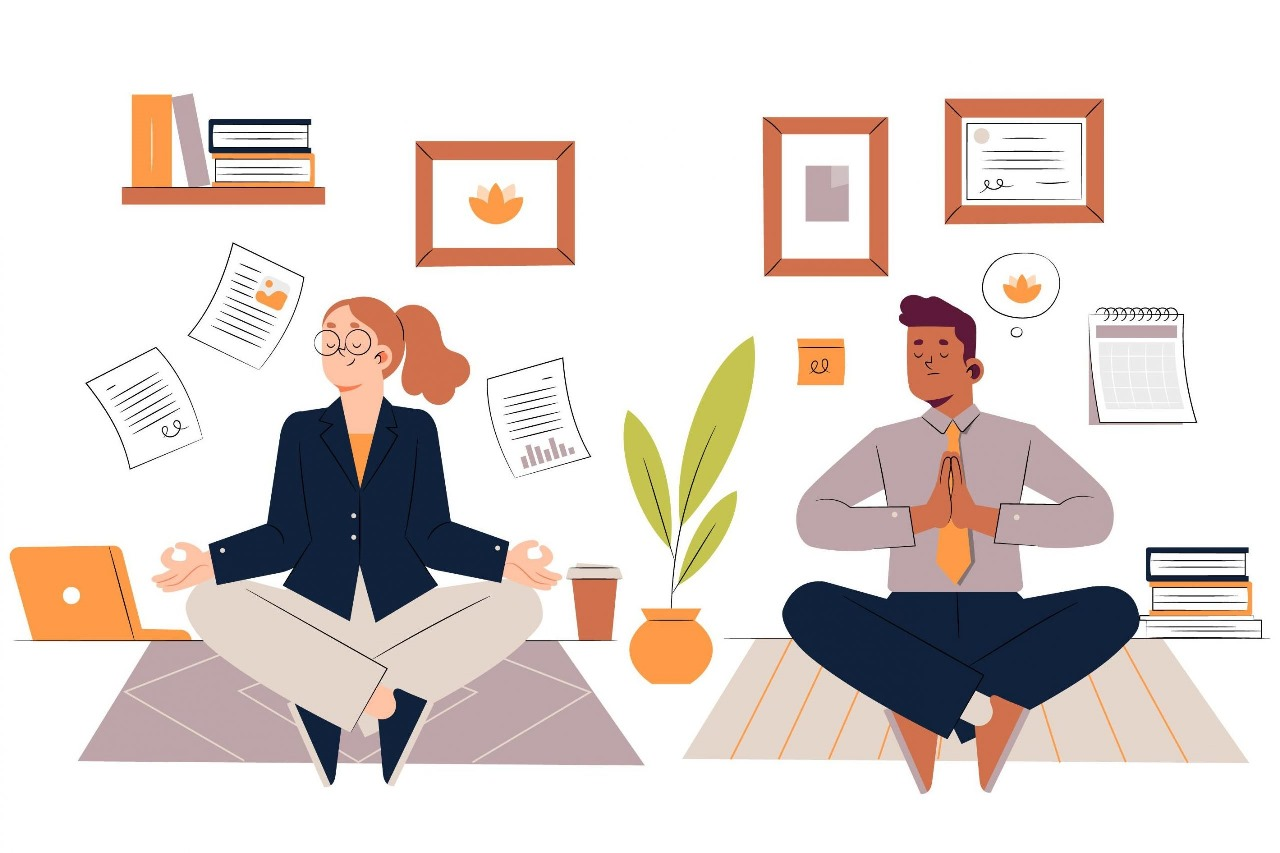

### Abstract:
A drastic thing happened and XYZ Technical Solutions have lost one of their important employees. The company is now very concerned about the health of their employees and would want you to find that set of employees who are in need or may be in need of treatment.

The goal is to help the organization to better understand the factors that contribute to employee health and well-being.

### Dataset Description:
The description of the data attributes is given below:

- **Timestamp**
- **Age**
- **Gender**
- **Country**
- **State:** If you live in the United States, which state or territory do you live in?
- **Self-Employed:** Are you self-employed?
- **Family History:** Do you have a family history of mental illness?
- **Treatment:** Does he or she really need treatment?
- **Work Interfere:** If you have a mental health condition, do you feel that it interferes with your work?
- **No Employees:** How many employees does your company or organization have?
- **Remote Work:** Do you work remotely (outside of an office) at least 50% of the time?
- **Tech Company:** Is your employer primarily a tech company/organization?
- **Benefits:** Does your employer provide mental health benefits?
- **Care Options:** Do you know the options for mental health care your employer provides?
- **Wellness Program:** Has your employer ever discussed mental health as part of an employee wellness program?
- **Seek Help:** Does your employer provide resources to learn more about mental health issues and how to seek help?
- **Anonymity:** Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
- **Leave:** How easy is it for you to take medical leave for a mental health condition?
- **Mental Health Consequence:** Do you think that discussing a mental health issue with your employer would have negative consequences?
- **Physical Health Consequence:** Do you think that discussing a physical health issue with your employer would have negative consequences?
- **Coworkers:** Would you be willing to discuss a mental health issue with your coworkers?
- **Supervisor:** Would you be willing to discuss a mental health issue with your direct supervisor(s)?
- **Mental Health Interview:** Would you bring up a mental health issue with a potential employer in an interview?
- **Physical Health Interview:** Would you bring up a physical health issue with a potential employer in an interview?
- **Mental vs Physical:** Do you feel that your employer takes mental health as seriously as physical health?
- **Observed Consequence:** Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
- **Comments:** Any additional notes or comments.
itional notes or comments.



### import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

C:\Users\razas\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Reading data 

In [2]:
data = pd.read_csv("employee_train.csv",header = 0,delimiter = ',')
test_data = pd.read_csv("employee_test.csv",header = 0,delimiter = ',')

In [3]:
pd.set_option('display.max_columns',None)
data.head()

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
test_data.head()

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,8/29/2014 11:32,39,Male,United Kingdom,NaN,Yes,Yes,Sometimes,5-Jan,Yes,Yes,No,Yes,Yes,Yes,Yes,Somewhat difficult,No,No,Yes,Yes,No,Maybe,Yes,Yes,These result may be a tad confusing so a summa...
1,2,8/29/2014 11:32,26,female,United States,WA,No,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,No,Yes,I should note one of the places my employer fa...
2,3,8/29/2014 11:33,23,Female,United States,IL,No,Yes,Sometimes,26-100,No,No,No,No,No,No,Don't know,Somewhat difficult,Yes,No,No,Some of them,No,Maybe,No,No,NaN
3,4,8/29/2014 11:34,35,Male,Switzerland,NaN,No,Yes,Often,More than 1000,No,Yes,Don't know,Not sure,No,No,Yes,Very easy,No,No,Some of them,Some of them,No,Maybe,No,No,NaN
4,5,8/29/2014 11:36,36,Male,United States,FL,No,No,Never,5-Jan,Yes,Yes,Don't know,Not sure,Don't know,Don't know,Don't know,Very easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN


### Understanding the data

In [5]:
data.shape

(1048, 28)

#### The dataset comprises 1048 observations and 28 columns, with 1 dependent variable and the remaining 27 independent variables.

In [6]:
data.columns

Index(['S.No', 'Timestamp', 'Age', 'Gender', 'Country', 'state',
       'self_employed', 'family_history', 'treatment', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [7]:
data.dtypes

S.No                          int64
Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                    

##### we can see that most of the variables are categorical variables

In [8]:
data.describe(include = 'all')

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1048.000000,1048,1.048000e+03,1048,1048,636,1030,1048,1048,812,1048,1048,1048,1035,1048,1044,1048,1048,1044,1048,1048,1048,1048,1048,1048,1048,1048,132
unique,NaN,679,NaN,45,42,45,2,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2,128
top,NaN,8/27/2014 15:24,NaN,Male,United States,CA,No,No,No,Sometimes,25-Jun,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,NaN,8,NaN,518,644,123,906,643,536,386,245,733,870,400,422,692,534,685,462,424,773,651,439,835,461,471,902,5
mean,524.500000,NaN,9.541988e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,302.675844,NaN,3.089010e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,262.750000,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,524.500000,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,786.250000,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Key Insights:

- **Gender Distribution**: Majority are males (518), indicating a male-dominated workforce in this survey.
- **Location**: Most responses are from the United States (644), with California leading (123).
- **Self-Employment**: 906 are not self-employed, suggesting most respondents work in corporate settings.
- **Family History**: 643 do not have a family history of mental illness.
- **Mental Health Treatment**: Close split—536 have not sought treatment, while 512 have.
- **Work Interference**: 386 report that mental health sometimes interferes with work.
- **Company Size**: Most employees work in companies with 25-100 employees (245).
- **Remote Work**: 733 do not work remotely, reflecting a traditional office workforce.
- **Tech Employees**: 870 respondents work in tech companies, a high-stress sector.
- **Mental Health Importance**: 835 believe mental health is as important as physical health.
- **Coworker & Supervisor Support**: Strong support from coworkers (773) and supervisors (651) for mental health issues.
- **Stigma**: While physical health issues are openly addressed, mental health stigma may still exist for 461 respondents.


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S.No                       1048 non-null   int64 
 1   Timestamp                  1048 non-null   object
 2   Age                        1048 non-null   int64 
 3   Gender                     1048 non-null   object
 4   Country                    1048 non-null   object
 5   state                      636 non-null    object
 6   self_employed              1030 non-null   object
 7   family_history             1048 non-null   object
 8   treatment                  1048 non-null   object
 9   work_interfere             812 non-null    object
 10  no_employees               1048 non-null   object
 11  remote_work                1048 non-null   object
 12  tech_company               1048 non-null   object
 13  benefits                   1035 non-null   object
 14  care_opt

##### We can observe that many columns, including state, work_interfere, and comments, have missing values based on the Non-Null Count.


In [10]:
for i in data.columns:
    if i != 'Timestamp' and i != 'comments':  #because 'Timestamp' is a date-time field (with many unique values), and 'comments' could contain free text
        print("COLUMN: ", i.upper())  #t prints the column name in uppercase.
#This is done to make the output easier to read and to clearly indicate which column's data is being displayed.
        print("")
        print(data[i].unique())
        print("")

COLUMN:  S.NO

[   1    2    3 ... 1046 1047 1048]

COLUMN:  AGE

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8]

COLUMN:  GENDER

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme

##### By applying domain-specific information, we may eliminate the irrelevant independent variable.

Sno, time stamp, comments, country, and state are irrelevant in this data when it comes to predicting employee wenessng
##### 1) Feature Selection.
es

In [11]:
df = data.drop(['S.No', 'Timestamp','Country', 'state','comments'], axis =1)
df_test = test_data.drop(['S.No', 'Timestamp','Country', 'state','comments'], axis =1)

In [12]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,25-Jun,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,25-Jun,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [13]:
df_test.head()

,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,39,Male,Yes,Yes,Sometimes,5-Jan,Yes,Yes,No,Yes,Yes,Yes,Yes,Somewhat difficult,No,No,Yes,Yes,No,Maybe,Yes,Yes
1,26,female,No,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,No,Yes
2,23,Female,No,Yes,Sometimes,26-100,No,No,No,No,No,No,Don't know,Somewhat difficult,Yes,No,No,Some of them,No,Maybe,No,No
3,35,Male,No,Yes,Often,More than 1000,No,Yes,Don't know,Not sure,No,No,Yes,Very easy,No,No,Some of them,Some of them,No,Maybe,No,No
4,36,Male,No,No,Never,5-Jan,Yes,Yes,Don't know,Not sure,Don't know,Don't know,Don't know,Very easy,No,No,Some of them,Some of them,No,No,Don't know,No


##### Handling Missing value

In [14]:
df.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               236
no_employees                   0
remote_work                    0
tech_company                   0
benefits                      13
care_options                   0
wellness_program               4
seek_help                      0
anonymity                      0
leave                          4
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [15]:
df_test.isnull().sum()

Age                           0
Gender                        0
self_employed                 0
family_history                0
work_interfere               28
no_employees                  0
remote_work                   0
tech_company                  0
benefits                      3
care_options                  0
wellness_program              2
seek_help                     0
anonymity                     0
leave                         5
mental_health_consequence     0
phys_health_consequence       0
coworkers                     0
supervisor                    0
mental_health_interview       0
phys_health_interview         0
mental_vs_physical            0
obs_consequence               0
dtype: int64

In [16]:
df['self_employed'].fillna(df['self_employed'].mode()[0], inplace = True)

In [17]:
#df['work_interfere'].fillna(df['work_interfere'].mode()[0], inplace = True)
#as work_interfere is multi class variable so we added a new class for NaN values

In [18]:
df['work_interfere'].value_counts()

work_interfere
Sometimes    386
Never        178
Rarely       144
Often        104
Name: count, dtype: int64

In [19]:
df['work_interfere'].fillna("Don't Know", inplace = True)

In [20]:
df.isnull().sum()

Age                           0
Gender                        0
self_employed                 0
family_history                0
treatment                     0
work_interfere                0
no_employees                  0
remote_work                   0
tech_company                  0
benefits                     13
care_options                  0
wellness_program              4
seek_help                     0
anonymity                     0
leave                         4
mental_health_consequence     0
phys_health_consequence       0
coworkers                     0
supervisor                    0
mental_health_interview       0
phys_health_interview         0
mental_vs_physical            0
obs_consequence               0
dtype: int64

In [21]:
df['benefits'].dtype

dtype('O')

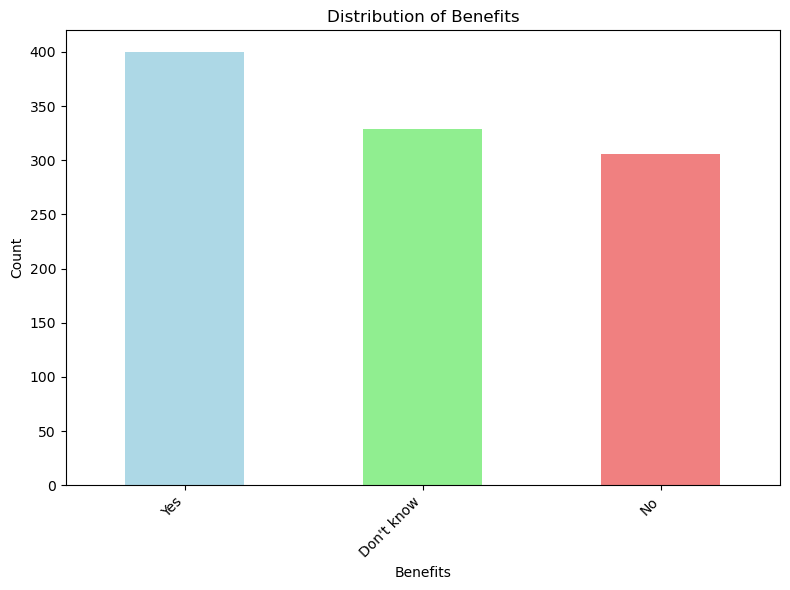

In [22]:
import matplotlib.pyplot as plt
benefit_counts = df['benefits'].value_counts()

colors = ['lightblue', 'lightgreen', 'lightcoral']

plt.figure(figsize=(8, 6))
benefit_counts.plot(kind='bar', color=colors[:len(benefit_counts)])  # Apply different colors for the bars
plt.title('Distribution of Benefits')
plt.xlabel('Benefits')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [23]:
df['benefits'].fillna(df['benefits'].mode()[0], inplace = True)

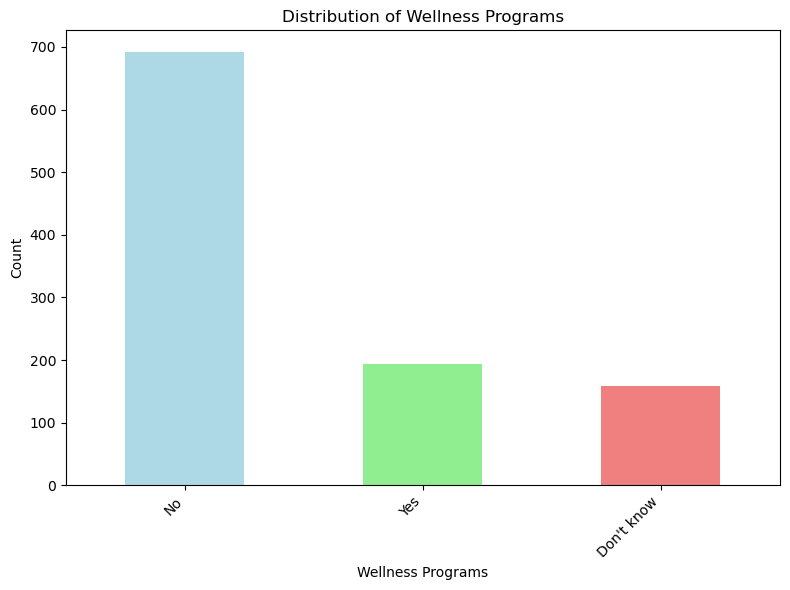

In [24]:
import matplotlib.pyplot as plt
wellness_counts = df['wellness_program'].value_counts()
colors = ['lightblue', 'lightgreen', 'lightcoral']

plt.figure(figsize=(8, 6))
wellness_counts.plot(kind='bar', color=colors[:len(wellness_counts)])  # Assign colors based on the number of classes
plt.title('Distribution of Wellness Programs')
plt.xlabel('Wellness Programs')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [25]:
df['wellness_program'].fillna(df['wellness_program'].mode()[0], inplace = True)

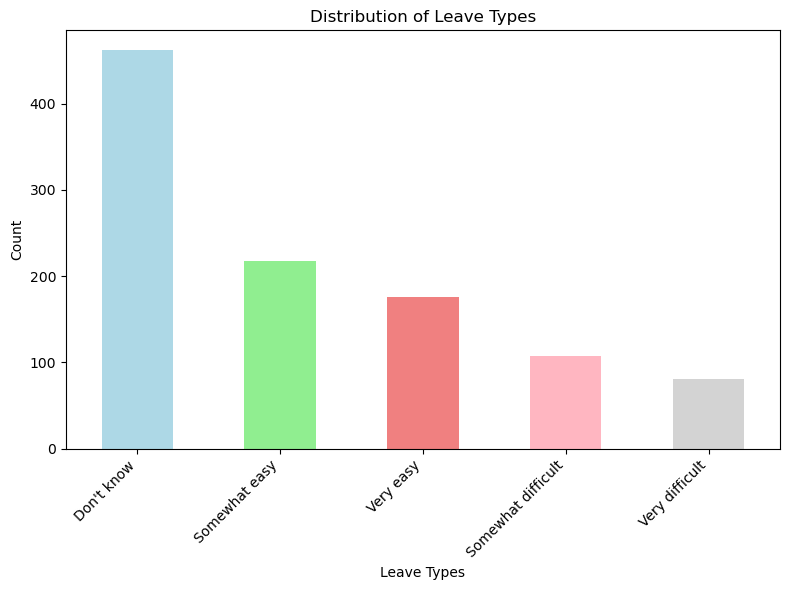

In [26]:
import matplotlib.pyplot as plt
leave_counts = df['leave'].value_counts()

colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightgray']

plt.figure(figsize=(8, 6))
leave_counts.plot(kind='bar', color=colors[:len(leave_counts)])
plt.title('Distribution of Leave Types')
plt.xlabel('Leave Types')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
df['leave'].fillna(df['leave'].mode()[0], inplace = True)

In [28]:
df.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [29]:
df_test['work_interfere'].fillna("Don't Know", inplace = True)

In [30]:
df_test.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     3
care_options                 0
wellness_program             2
seek_help                    0
anonymity                    0
leave                        5
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

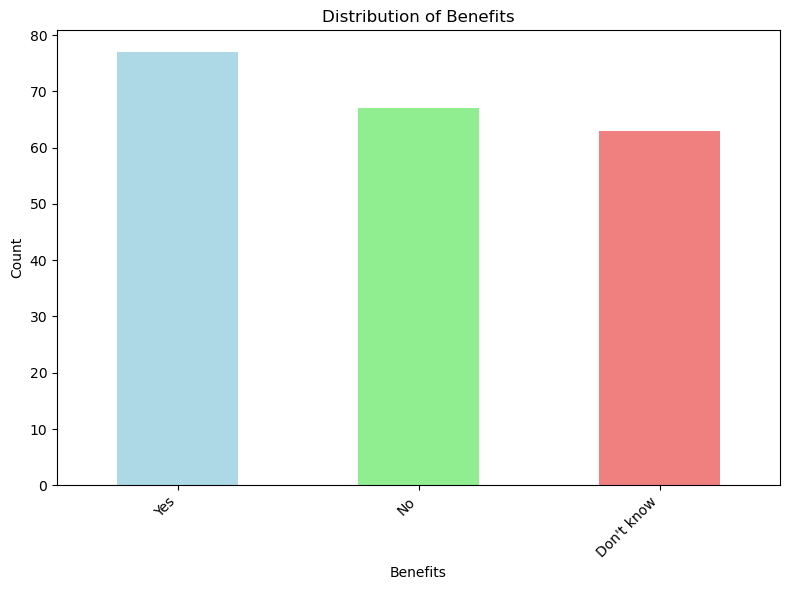

In [31]:
import matplotlib.pyplot as plt
benefit_counts = df_test['benefits'].value_counts()
colors = ['lightblue', 'lightgreen', 'lightcoral']
plt.figure(figsize=(8, 6))
benefit_counts.plot(kind='bar', color=colors[:len(benefit_counts)])  # Apply different colors for the bars
plt.title('Distribution of Benefits')
plt.xlabel('Benefits')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


In [32]:
df_test['benefits'].fillna(df_test['benefits'].mode()[0], inplace = True)

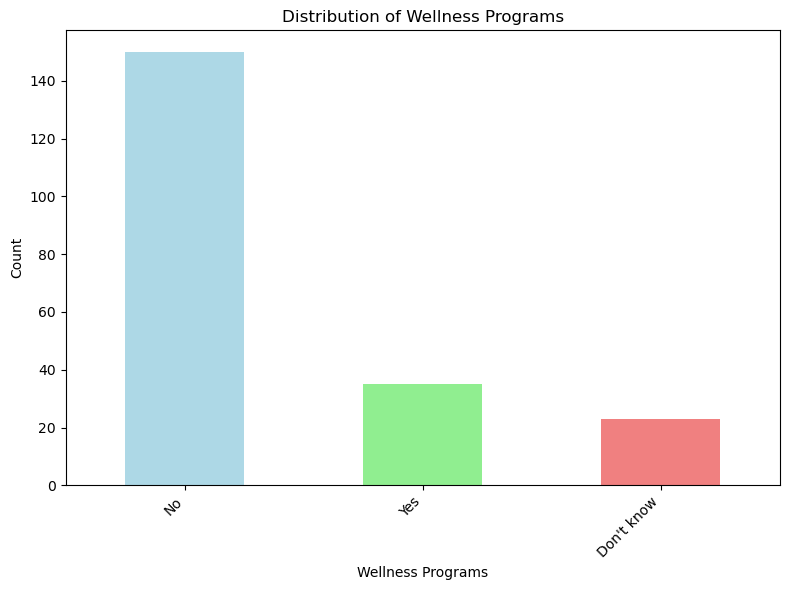

In [33]:
import matplotlib.pyplot as plt
wellness_counts = df_test['wellness_program'].value_counts()
colors = ['lightblue', 'lightgreen', 'lightcoral']
plt.figure(figsize=(8, 6))
wellness_counts.plot(kind='bar', color=colors[:len(wellness_counts)])  # Apply different colors for the bars
plt.title('Distribution of Wellness Programs')
plt.xlabel('Wellness Programs')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


In [34]:
df_test['wellness_program'].fillna(df_test['wellness_program'].mode()[0], inplace = True)

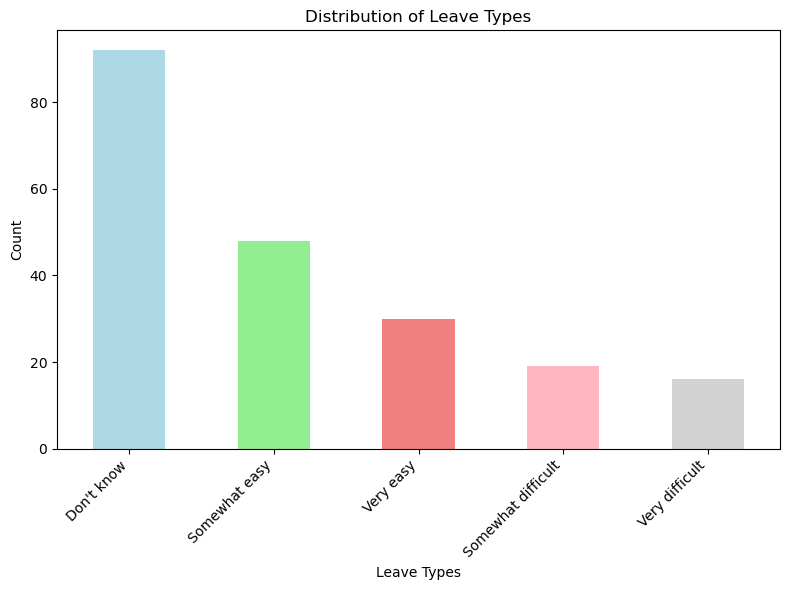

In [35]:
import matplotlib.pyplot as plt
leave_counts = df_test['leave'].value_counts()
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightgray']

plt.figure(figsize=(8, 6))
leave_counts.plot(kind='bar', color=colors[:len(leave_counts)])  # Apply different colors for the bars
plt.title('Distribution of Leave Types')
plt.xlabel('Leave Types')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


In [36]:
df_test['leave'].fillna(df_test['leave'].mode()[0], inplace = True)

In [37]:
df_test.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

##### Handling Age Variable

#### 1. Calculate Mean Age:
- Compute the mean age of individuals whose ages are between **17** and **65** from both `df` and `df_test`.

#### 2. Replace Out-of-Range Values:
- For each DataFrame, replace ages that are:
  - Below **17** or 
  - Above **65** 
- with the calculated mean age.


In [38]:
#calculating mean for values between 17 to 65
mean_age = int(df['Age'][(df['Age']<=65) & (df['Age']>=17)].mean())
mean_age_test = int(df_test['Age'][(df_test['Age']<=65) & (df_test['Age']>=17)].mean())

In [39]:
#Replacing values greater than 65 or lower than 17 with mean
df['Age'] = df['Age'].apply(lambda x: mean_age if (x>65 or x<17) else int(x))
df_test['Age']= df_test['Age'].apply(lambda x: mean_age_test if(x>65 or x<17) else int(x))

##### Because there are too many classes for single labels, we must manually encode the values to female(0), male(1), and others(2).


In [40]:
df['Gender'] = df['Gender'].replace(('Female','female','F','Woman','f','Femake','woman','Female ','Cis Female','cis-female/femme','Female (cis)'),0)
df['Gender'] = df['Gender'].replace(('M','Male','male','m','Male-ish','maile','Mal','Make','Male ','Man','msle','Mail','Malr','Cis Male','Male (CIS)','cis male'),1)
df['Gender'] = df['Gender'].replace(('Trans-female','something kinda male?','queer/she/they','non-binary',
                                 'Nah','All','Enby','fluid','Genderqueer','Androgyne','Agender','Guy (-ish) ^_^',
                                  'male leaning androgynous','Trans woman','Neuter','Female (trans)','queer',
                                  'A little about you'),2)

In [41]:
df['Gender'].unique()

array([0, 1, 2], dtype=int64)

In [42]:
df_test['Gender'].unique()

array(['Male', 'female', 'Female', 'M', 'male', 'Male ', 'm', 'p', 'F',
       'Woman', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means', 'f'],
      dtype=object)

#### We need to convert all variables except Age to discrete/numerical variables
##### We need to manually encode the values to female(0),male(1) and others(2) as there are too many class for single labels
##### 
'''['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female' 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal' 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah' 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender' 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male ' 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer' 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr']''

In [43]:
df_test['Gender'] = df_test['Gender'].replace(('Female','female','F','Woman','f','femail'),0)
df_test['Gender'] = df_test['Gender'].replace(('M','Male','male','m','Male ','Cis Man'),1)
df_test['Gender'] = df_test['Gender'].replace(('p','ostensibly male, unsure what that really means'),2)

In [44]:
df_test['Gender'].unique()

array([1, 0, 2], dtype=int64)

In [45]:
df['no_employees'].unique()

array(['25-Jun', 'More than 1000', '26-100', '100-500', '5-Jan',
       '500-1000'], dtype=object)

In [46]:
df['no_employees'] = df['no_employees'].replace('25-Jun', '6-25')

In [47]:
df['no_employees'] = df['no_employees'].replace('5-Jan', '1-5')

In [48]:
df['no_employees'].unique()

array(['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'],
      dtype=object)

In [49]:
df['no_employees'] = df['no_employees'].map({'1-5':0,'6-25':1,'26-100':2,'100-500':3,'500-1000':4,'More than 1000':5})

In [50]:
df_test['no_employees'].unique()

array(['5-Jan', 'More than 1000', '26-100', '500-1000', '25-Jun',
       '100-500'], dtype=object)

In [51]:
df_test['no_employees'] = df_test['no_employees'].replace('25-Jun', '6-25')

In [52]:
df_test['no_employees'] = df_test['no_employees'].replace('5-Jan', '1-5')

In [53]:
df_test['no_employees'].unique()

array(['1-5', 'More than 1000', '26-100', '500-1000', '6-25', '100-500'],
      dtype=object)

In [54]:
df_test['no_employees'] = df_test['no_employees'].map({'1-5':0,'6-25':1,'26-100':2,'100-500':3,'500-1000':4,'More than 1000':5})

In [55]:
df_test.dtypes

Age                           int64
Gender                        int64
self_employed                object
family_history               object
work_interfere               object
no_employees                  int64
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
dtype: object

In [56]:
df['leave'].unique()

array(['Somewhat easy', "Don't know", 'Somewhat difficult',
       'Very difficult', 'Very easy'], dtype=object)

In [57]:
#Reducing redundant class to a single class for 'leaves' variable
df['leave'] = df['leave'].replace(['Somewhat easy', 'Very easy'],'easy')
df_test['leave'] = df_test['leave'].replace(['Somewhat easy', 'Very easy'],'easy')

In [58]:
df.dtypes

Age                           int64
Gender                        int64
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                  int64
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
dtype: object

for i in df.columns:
    if i != 'Timestamp' and i != 'comments':
        print("COLUMN: ", i.upper())
        print("")
        print(df[i].unique())
        print("")

In [59]:
df['treatment'].value_counts()

treatment
No     536
Yes    512
Name: count, dtype: int64

In [60]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
            df[i] = encode.fit_transform(df[i])

### Label Encoding for Categorical Features
- **LabelEncoder** is used to convert categorical variables (columns with data type `object`) into numeric labels.
- The loop iterates over all columns in the DataFrame (`df`), and for each column that has a data type of `object` (categorical data), `LabelEncoder` is applied.
- `encode.fit_transform(df[i])` assigns a unique numeric value to each unique category in the column, converting the categorical data into numerical form, which is essential for most machine learning models.


In [61]:
df.dtypes

Age                          int64
Gender                       int64
self_employed                int32
family_history               int32
treatment                    int32
work_interfere               int32
no_employees                 int64
remote_work                  int32
tech_company                 int32
benefits                     int32
care_options                 int32
wellness_program             int32
seek_help                    int32
anonymity                    int32
leave                        int32
mental_health_consequence    int32
phys_health_consequence      int32
coworkers                    int32
supervisor                   int32
mental_health_interview      int32
phys_health_interview        int32
mental_vs_physical           int32
obs_consequence              int32
dtype: object

In [62]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,0,0,1,2,1,0,1,2,1,1,2,2,3,1,1,1,2,1,0,2,0
1,44,1,0,0,0,3,5,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,32,1,0,0,0,3,1,0,1,1,0,1,1,0,1,1,1,2,2,2,2,1,0
3,31,1,0,1,1,2,2,0,1,1,2,1,1,1,1,2,2,1,0,0,0,1,1
4,31,1,0,0,0,1,3,1,1,2,0,0,0,0,0,1,1,1,2,2,2,0,0


In [63]:
#test set
for i in df_test.columns:
    if df_test[i].dtype == 'object':
            df_test[i] = encode.fit_transform(df_test[i])

In [64]:
df_test.dtypes

Age                          int64
Gender                       int64
self_employed                int32
family_history               int32
work_interfere               int32
no_employees                 int64
remote_work                  int32
tech_company                 int32
benefits                     int32
care_options                 int32
wellness_program             int32
seek_help                    int32
anonymity                    int32
leave                        int32
mental_health_consequence    int32
phys_health_consequence      int32
coworkers                    int32
supervisor                   int32
mental_health_interview      int32
phys_health_interview        int32
mental_vs_physical           int32
obs_consequence              int32
dtype: object

In [65]:
df_test.head()

,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,39,1,1,1,4,0,1,1,1,2,2,2,2,1,1,1,2,2,1,0,2,1
1,26,0,0,1,4,5,0,1,2,2,1,1,0,0,1,1,1,2,1,0,1,1
2,23,0,0,1,4,2,0,0,1,0,1,1,0,1,2,1,0,1,1,0,1,0
3,35,1,0,1,2,5,0,1,0,1,1,1,2,3,1,1,1,1,1,0,1,0
4,36,1,0,0,1,0,1,1,0,1,0,0,0,3,1,1,1,1,1,1,0,0


In [66]:
x = df.loc[:, df.columns != 'treatment']
y = df.loc[:,'treatment']

In [67]:
print(x.shape)
print(y.shape)

(1048, 22)
(1048,)


In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x)
x = scaler.transform(x)

#### Data Standardization with `StandardScaler`
- **StandardScaler** is used to standardize the features by removing the mean and scaling to unit variance.
- This ensures that each feature has a mean of 0 and a standard deviation of 1, which is crucial for algorithms sensitive to feature scaling (e.g., logistic regression, SVM, neural networks).
- First, the scaler is **fitted** to the data using `scaler.fit(x)` to compute the mean and variance for each feature.
- Then, the data is **transformed** using `scaler.transform(x)`, applying the scaling to the dataset.


In [69]:
df_test = scaler.transform(df_test)

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 10)

In [71]:
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

x_train: (733, 22)
x_test: (315, 22)
y_train: (733,)
y_test: (315,)


In [72]:
from sklearn.linear_model import LogisticRegression
#training the model
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [73]:
#Looking for coefficients value of output equation 
Coefficients = list(zip(df.columns[:-1],lr.coef_.ravel())) #ravel()
print(Coefficients)
print(lr.intercept_)

[('Age', 0.18686432104911285), ('Gender', -0.26494951106907993), ('self_employed', -0.030262797141716046), ('family_history', 0.5045468386742654), ('treatment', 1.579206844864223), ('work_interfere', -0.10816940606791015), ('no_employees', 0.007738689455995526), ('remote_work', -0.19352027985960402), ('tech_company', 0.2930209449056731), ('benefits', 0.3425098781063885), ('care_options', -0.04823089487110644), ('wellness_program', -0.11521610440668396), ('seek_help', 0.14234856127478782), ('anonymity', -0.09120361177829653), ('leave', -0.03373053603865394), ('mental_health_consequence', -0.008856842979265167), ('phys_health_consequence', 0.1662900574101394), ('coworkers', -0.04917004775463844), ('supervisor', 0.05769512303791449), ('mental_health_interview', 0.24077752466993033), ('phys_health_interview', -0.024829228645432914), ('mental_vs_physical', 0.35629399130611195)]
[-0.11096884]


In [74]:
#outputting Probability matrix
prob = lr.predict_proba(x_test)
prob

array([[0.91924254, 0.08075746],
       [0.48197366, 0.51802634],
       [0.48777738, 0.51222262],
       [0.30797136, 0.69202864],
       [0.15918405, 0.84081595],
       [0.7148254 , 0.2851746 ],
       [0.1296739 , 0.8703261 ],
       [0.02224881, 0.97775119],
       [0.98250432, 0.01749568],
       [0.28005004, 0.71994996],
       [0.06873096, 0.93126904],
       [0.83838796, 0.16161204],
       [0.69865387, 0.30134613],
       [0.01397332, 0.98602668],
       [0.36744512, 0.63255488],
       [0.91877735, 0.08122265],
       [0.85897384, 0.14102616],
       [0.0915435 , 0.9084565 ],
       [0.46851768, 0.53148232],
       [0.85703959, 0.14296041],
       [0.78832284, 0.21167716],
       [0.7289825 , 0.2710175 ],
       [0.97978213, 0.02021787],
       [0.23691995, 0.76308005],
       [0.13577517, 0.86422483],
       [0.84057077, 0.15942923],
       [0.95568424, 0.04431576],
       [0.13103532, 0.86896468],
       [0.06068578, 0.93931422],
       [0.60558475, 0.39441525],
       [0.

### Predicting Values
- **`lr.predict(x_test)`** uses the trained logistic regression model (`lr`) to predict the target variable for the test data (`x_test`).
- The resulting `y_pred` contains the predicted class labels for the observations in `x_test`, based on the learned relationships from the training data.


In [75]:
#Predicting values
y_pred = lr.predict(x_test)

In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cfm)

acc = accuracy_score(y_test, y_pred)
print("Accuracy Score:", acc)

print('Classification Report: ')
print(classification_report(y_test, y_pred))


Confusion Matrix: 
[[125  35]
 [ 23 132]]
Accuracy Score: 0.8158730158730159
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       160
           1       0.79      0.85      0.82       155

    accuracy                           0.82       315
   macro avg       0.82      0.82      0.82       315
weighted avg       0.82      0.82      0.82       315



In [77]:
for i in np.arange(0.4,0.61,0.01):
    pred = np.where(prob[:,1]>i,1,0)
    cfm = confusion_matrix(y_test,pred)
    err = cfm[1,0]+cfm[0,1]
    print("Error for threshold,",i," : ",err, "and Type II error :",cfm[1,0],"and Type I error :",cfm[0,1])

Error for threshold, 0.4  :  58 and Type II error : 15 and Type I error : 43
Error for threshold, 0.41000000000000003  :  59 and Type II error : 17 and Type I error : 42
Error for threshold, 0.42000000000000004  :  62 and Type II error : 20 and Type I error : 42
Error for threshold, 0.43000000000000005  :  62 and Type II error : 20 and Type I error : 42
Error for threshold, 0.44000000000000006  :  62 and Type II error : 20 and Type I error : 42
Error for threshold, 0.45000000000000007  :  63 and Type II error : 21 and Type I error : 42
Error for threshold, 0.4600000000000001  :  60 and Type II error : 21 and Type I error : 39
Error for threshold, 0.4700000000000001  :  61 and Type II error : 22 and Type I error : 39
Error for threshold, 0.4800000000000001  :  61 and Type II error : 22 and Type I error : 39
Error for threshold, 0.4900000000000001  :  60 and Type II error : 23 and Type I error : 37
Error for threshold, 0.5000000000000001  :  58 and Type II error : 23 and Type I error : 3

##### The loop iterates over different threshold values, starting at 0.4 and incrementing by 0.01 up to 0.6.

##### ontains the predicted probabilities for class 1 (positive class) from the model.
##### For each threshold i, a prediction (1 or 0) is made:
##### If the probability for class 1 is greater than the threshold i, the instance is ##### classified as 1 (positive).
###### Otherwise, it’s classified as 0 (negative).

In [78]:
#prob is the probability matrix that we genearted above
y_pred_t = [1 if i>0.4 else 0 for i in prob[:,1]] 
#Here, 0.41 is the threshold. If the predicted probability for class 1 (i.e., prob[:, 1]) is greater than 0.41,
#the prediction is classified as 1 (indicating class 1); otherwise, it is classified as 0 (indicating class 0).

##### This line uses a fixed threshold of 0.4 for making predictions.
##### If the predicted probability for class 1 is greater than 0.4, the instance is classified as 1; otherwise, it’s classified as 0.

In [79]:
cfm = confusion_matrix(y_test,y_pred_t)
print("Confusion Matrix: ")
print(cfm)

acc = accuracy_score(y_test,y_pred_t)
print("accuracy score",acc)

print('classification report : ')
print(classification_report(y_test,y_pred_t))

Confusion Matrix: 
[[117  43]
 [ 15 140]]
accuracy score 0.8158730158730159
classification report : 
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       160
           1       0.77      0.90      0.83       155

    accuracy                           0.82       315
   macro avg       0.83      0.82      0.81       315
weighted avg       0.83      0.82      0.81       315



In [80]:
prob_test = lr.predict_proba(df_test)
prob_test

array([[0.02902168, 0.97097832],
       [0.02495175, 0.97504825],
       [0.14191655, 0.85808345],
       [0.65240144, 0.34759856],
       [0.87885681, 0.12114319],
       [0.55828791, 0.44171209],
       [0.04749941, 0.95250059],
       [0.9551149 , 0.0448851 ],
       [0.95741127, 0.04258873],
       [0.44183455, 0.55816545],
       [0.15225643, 0.84774357],
       [0.69829031, 0.30170969],
       [0.4071943 , 0.5928057 ],
       [0.90709902, 0.09290098],
       [0.90306608, 0.09693392],
       [0.17497312, 0.82502688],
       [0.34190789, 0.65809211],
       [0.87420169, 0.12579831],
       [0.76856023, 0.23143977],
       [0.63076849, 0.36923151],
       [0.97581838, 0.02418162],
       [0.23357768, 0.76642232],
       [0.24492841, 0.75507159],
       [0.16077266, 0.83922734],
       [0.93038898, 0.06961102],
       [0.23229769, 0.76770231],
       [0.03720717, 0.96279283],
       [0.06806733, 0.93193267],
       [0.1147399 , 0.8852601 ],
       [0.04122208, 0.95877792],
       [0.

In [81]:
pred_test =[1 if i>0.4 else 0 for i in prob_test[:,1]]

In [82]:
pred_test

[1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1]

In [83]:
output=pd.read_csv("employee_test.csv", delimiter = ',')
output['treatment'] = pred_test
output['treatment'] = output['treatment'].map({1:"Yes",0:"No"})

In [84]:
output

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,treatment
0,1,8/29/2014 11:32,39,Male,United Kingdom,NaN,Yes,Yes,Sometimes,5-Jan,Yes,Yes,No,Yes,Yes,Yes,Yes,Somewhat difficult,No,No,Yes,Yes,No,Maybe,Yes,Yes,These result may be a tad confusing so a summa...,Yes
1,2,8/29/2014 11:32,26,female,United States,WA,No,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,No,Yes,I should note one of the places my employer fa...,Yes
2,3,8/29/2014 11:33,23,Female,United States,IL,No,Yes,Sometimes,26-100,No,No,No,No,No,No,Don't know,Somewhat difficult,Yes,No,No,Some of them,No,Maybe,No,No,NaN,Yes
3,4,8/29/2014 11:34,35,Male,Switzerland,NaN,No,Yes,Often,More than 1000,No,Yes,Don't know,Not sure,No,No,Yes,Very easy,No,No,Some of them,Some of them,No,Maybe,No,No,NaN,No
4,5,8/29/2014 11:36,36,Male,United States,FL,No,No,Never,5-Jan,Yes,Yes,Don't know,Not sure,Don't know,Don't know,Don't know,Very easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,206,9/12/2015 11:17,26,male,United Kingdom,NaN,No,No,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN,No
206,207,9/26/2015 1:07,32,Male,United States,IL,No,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN,Yes
207,208,11/7/2015 12:36,34,male,United States,CA,No,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN,Yes
208,209,11/30/2015 21:25,46,f,United States,NC,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN,No


In [85]:
output['treatment'].value_counts()

treatment
Yes    138
No      72
Name: count, dtype: int64

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

feature_importances = gb.feature_importances_
print("Feature Importances:", list(zip(df.columns[:-1], feature_importances)))

Feature Importances: [('Age', 0.07396527582415903), ('Gender', 0.021639852640650256), ('self_employed', 0.0020866502435343964), ('family_history', 0.031533632074927945), ('treatment', 0.7260155259051919), ('work_interfere', 0.011408482522332055), ('no_employees', 0.013007825595938893), ('remote_work', 0.004850189865924792), ('tech_company', 0.008768292082759952), ('benefits', 0.029379477011203647), ('care_options', 0.003152226917759454), ('wellness_program', 0.008672241687432325), ('seek_help', 0.00484807199641269), ('anonymity', 0.007665479557075119), ('leave', 0.007172639368917816), ('mental_health_consequence', 0.0014398700947698489), ('phys_health_consequence', 0.008042621224922905), ('coworkers', 0.00803350177582107), ('supervisor', 0.002160824701381841), ('mental_health_interview', 0.011045159181540108), ('phys_health_interview', 0.004301452675647536), ('mental_vs_physical', 0.010810707051696537)]


In [87]:
prob = gb.predict_proba(x_test)
print("Probability Matrix: ")
print(prob)

Probability Matrix: 
[[0.98401421 0.01598579]
 [0.42835192 0.57164808]
 [0.38739426 0.61260574]
 [0.61703706 0.38296294]
 [0.11663145 0.88336855]
 [0.84808963 0.15191037]
 [0.07250029 0.92749971]
 [0.29465278 0.70534722]
 [0.99385348 0.00614652]
 [0.31699591 0.68300409]
 [0.22875734 0.77124266]
 [0.18505268 0.81494732]
 [0.78435029 0.21564971]
 [0.0567464  0.9432536 ]
 [0.4337031  0.5662969 ]
 [0.98605908 0.01394092]
 [0.94337727 0.05662273]
 [0.20461494 0.79538506]
 [0.53093663 0.46906337]
 [0.95281636 0.04718364]
 [0.89456909 0.10543091]
 [0.92625303 0.07374697]
 [0.99229282 0.00770718]
 [0.05103976 0.94896024]
 [0.03137645 0.96862355]
 [0.97004405 0.02995595]
 [0.97436758 0.02563242]
 [0.19250918 0.80749082]
 [0.02968329 0.97031671]
 [0.48509961 0.51490039]
 [0.87387349 0.12612651]
 [0.7202616  0.2797384 ]
 [0.21588463 0.78411537]
 [0.96080819 0.03919181]
 [0.19746148 0.80253852]
 [0.98676624 0.01323376]
 [0.08930696 0.91069304]
 [0.89681274 0.10318726]
 [0.99079929 0.00920071]
 [0.

In [88]:
y_pred = gb.predict(x_test)

In [89]:
cfm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cfm)

# Accuracy Score
acc = accuracy_score(y_test, y_pred)
print("Accuracy Score:", acc)

# Classification Report
print('Classification Report: ')
print(classification_report(y_test, y_pred))

Confusion Matrix: 
[[117  43]
 [ 20 135]]
Accuracy Score: 0.8
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.73      0.79       160
           1       0.76      0.87      0.81       155

    accuracy                           0.80       315
   macro avg       0.81      0.80      0.80       315
weighted avg       0.81      0.80      0.80       315




**Observation**: Both models have similar confusion matrices, with slight differences in False Positives and False Negatives.

#### Accuracy Score:
- **Both Models**: 0.81

#### Precision, Recall, and F1-Score:
- **Gradient Boosting**:
- **Class 0**: Precision = 0.85, Recall = 0.73, F1-Score = 0.80
- **Class 1**: Precision = 0.76, Recall = 0.89, F1-Score = 0.82

- **Logistic Regression**:
- **Class 0**: Precision = 0.89, Recall = 0.72, F1-Score = 0.79
- **Class 1**: Precision = 0.77, Recall = 0.90, F1-Score = 0.82

#### Conclusion:
- Both models perform similarly across accuracy, precision, recall, and F1-score.
- **Logistic Regression** performs well because the data may have **linear relationships**, making it a strong baseline model.
- **Gradient Boosting** didn’t significantly outperform Logistic Regression, likely due to the simplicity of the data.



In summary, the analysis revealed key factors impacting employee health at XYZ Technical Solutions. A predictive model identified employees at risk, highlighting the need for proactive measures.

**Key Findings**:
- Demographic and behavioral traits correlate with health risks.
- Improving employee health can boost productivity and morale.

**Recommendations**:
1. **Enhance Wellness Programs**: Target physical and mental health initiatives.
2. **Conduct Regular Assessments**: Monitor well-being to identify those needing support.
3. **Foster Open Communication**: Encourage discussions about health issues.

Implementing these steps will help support employee health, improve retention, and enhance organizational success.


In [90]:
import pickle


In [91]:
# Save the 'lr' model to a file
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(lr, file)
